# <p align="center">📊 **End-to-End Customer Churn Prediction Using Machine Learning Models** 📊</p>


<p align="center">
  <img src="https://thebrainpoint.com/wp-content/uploads/2025/10/Predictive-Analytics-Helps-Reduce-Customer-Churn.jpg" width="800"/>
</p>

# **My Information**

### ‎‧₊**˚✿[My Name]✿˚** : **[Mohamed Reda Ramadan Khamis]**
### ‎‧₊**˚✿[My Phone Number]✿˚** : **[01554725661]**

🌸 ✿ ✿ ✿ ✿ ✿ 🌸🌸 ✿ ✿ ✿ ✿ ✿ 🌸🌸 ✿ ✿ ✿ ✿ ✿ 🌸🌸 ✿ ✿ ✿ ✿ ✿ 🌸🌸 ✿ ✿ ✿ ✿ ✿ 🌸🌸 ✿ ✿ ✿ ✿ ✿ 🌸🌸 


#  **Telco Churn Prediction – Machine Learning Models Summary**

##  Data Preparation
- Loaded the preprocessed dataset after cleaning, encoding, and feature engineering.
- Separated the dataset into:
  - **Features (X)**
  - **Target variable (y): Churn**

---

##  Train–Test Split
- The dataset was split into **80% training** and **20% testing**.
- Used **stratified sampling** to preserve class distribution due to class imbalance.

---

##  Handling Imbalanced Data
- Applied **SMOTE (Synthetic Minority Over-sampling Technique)** on the training set.
- This improved model learning for the minority class (Churn = 1).

---

##  Feature Scaling
- Used **StandardScaler** for models sensitive to feature scale:
  - Logistic Regression
- Tree-based models were trained on unscaled data.

---

##  Machine Learning Models
The following models were trained and evaluated:

- **Logistic Regression**
- **Random Forest Classifier**
- **Gradient Boosting Classifier**
- **XGBoost Classifier**

Each model was trained using the resampled training data.

---

##  Hyperparameter Optimization
- Performed **Hyperparameter Tuning** using `GridSearchCV`.
- Used **Stratified K-Fold Cross Validation (k = 5)**.
- Evaluation metrics:
  - **Recall** (primary metric for churn detection)
  - **F1-score**

This ensured robust and unbiased model selection.

---

##  Model Evaluation
- Evaluated models on the unseen test set using:
  - Accuracy
  - Confusion Matrix
  - Precision, Recall, and F1-score
- Focused on **Recall for Churn class** to minimize false negatives.

---

##  Best Models Selection
- **Logistic Regression and XGBoost Models Classifier** achieved the best overall performance.
- Selected as the final model for deployment.

---

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\PC\Desktop\machine learning\Data Science Projects\telco_churn_processed.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,0,1,29.85,29.85,0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,56.95,1889.50,0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,2,1,0,1,1,0,...,0,1,53.85,108.15,1,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,45,0,0,1,0,1,...,1,0,42.30,1840.75,0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,70.70,151.65,1,1.0,0.0,0.0,1.0,0.0


In [21]:
X = df.drop(columns=["Churn"])
y = df["Churn"]


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   
)

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled  = scaler.transform(X_test)

<h1 align="center">
  <span style="color:yellow; background:purple; padding:4px 8px; border-radius:8px; font-weight:bold;">
     Machine Learning Modeling & Predictive Analytics
  </span>
</h1>

<div style="text-align:center;">
<span style="color:white; background-color:darkblue; font-size:20px; font-weight:bold; padding:7px; border-radius:5px;">
Statistical Models (Logistic Regression)
</span>
</div>

<span style="color:white; background-color:red; font-size:20px; font-weight:bold">
Logistic Regression
</span>

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train_smote)

LogisticRegression(max_iter=1000)

<div style="text-align:center;">
<span style="color:white; background-color:darkblue; font-size:20px; font-weight:bold; padding:7px; border-radius:5px;">
Non-Statistical Models (Random Forest, Gradient Boosting and XGBOOST)
</span>
</div>

<span style="color:white; background-color:red; font-size:20px; font-weight:bold">
 Random Forest 
 </span>

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42
)
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

<span style="color:white; background-color:red; font-size:20px; font-weight:bold">
 XGBoost 
 </span>

In [27]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , recall_score

def evaluate(model, X, y, name):
    y_pred = model.predict(X)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y, y_pred))
    print(confusion_matrix(y, y_pred))
    print(classification_report(y, y_pred))

evaluate(lr, X_test_scaled, y_test, "Logistic Regression")
evaluate(rf, X_test, y_test, "Random Forest")
evaluate(xgb, X_test, y_test, "XGBoost")



Logistic Regression
Accuracy: 0.7800711743772242
[[858 175]
 [134 238]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1033
           1       0.58      0.64      0.61       372

    accuracy                           0.78      1405
   macro avg       0.72      0.74      0.73      1405
weighted avg       0.79      0.78      0.78      1405


Random Forest
Accuracy: 0.7850533807829182
[[860 173]
 [129 243]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1033
           1       0.58      0.65      0.62       372

    accuracy                           0.79      1405
   macro avg       0.73      0.74      0.73      1405
weighted avg       0.79      0.79      0.79      1405


XGBoost
Accuracy: 0.7807829181494662
[[886 147]
 [161 211]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1033
           1       0.59      0.57   

<span style="color:white; background-color:red; font-size:20px; font-weight:bold">
 Gradient Boosting 
 </span>

In [29]:
from sklearn.ensemble import GradientBoostingClassifier


In [30]:
gb = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)


In [31]:
gb.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=300,
                           random_state=42, subsample=0.8)

In [32]:
evaluate(gb, X_test, y_test, "Gradient Boosting")



Gradient Boosting
Accuracy: 0.7829181494661922
[[871 162]
 [143 229]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1033
           1       0.59      0.62      0.60       372

    accuracy                           0.78      1405
   macro avg       0.72      0.73      0.73      1405
weighted avg       0.79      0.78      0.78      1405



<span style="color:white; background-color:red; font-size:20px; font-weight:bold">
Cross Validation
</span>

In [33]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

<span style="color:white; background-color:red; font-size:20px; font-weight:bold">
Logistic Regression – Hyperparameter Tuning
</span>

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
lr = LogisticRegression(max_iter=2000)

param_grid_lr = {
    "C": [0.001, 0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]
}

grid_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    cv=cv,
    scoring="recall",
    n_jobs=-1
)

grid_lr.fit(X_train_scaled, y_train_smote)

best_lr = grid_lr.best_estimator_
print("Best LR Params:", grid_lr.best_params_)

Best LR Params: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


In [36]:
print(grid_lr.best_score_)

0.9215718882392381


<span style="color:white; background-color:red; font-size:20px; font-weight:bold">
 Random Forest – Hyperparameter Tuning
 </span>

In [37]:
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [200, 300],
    "max_depth": [None, 8, 12],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid_rf = GridSearchCV(
    rf,
    param_grid_rf,
    cv=cv,
    scoring="f1",
    n_jobs=-1
)

grid_rf.fit(X_train_smote, y_train_smote)

best_rf = grid_rf.best_estimator_
print("Best RF Params:", grid_rf.best_params_)


Best RF Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [38]:
print(grid_rf.best_score_)

0.854891502053813


<span style="color:white; background-color:red; font-size:20px; font-weight:bold">
 Gradient Boosting – Hyperparameter Tuning
 </span>

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)

param_grid_gb = {
    "n_estimators": [200, 300],
    "learning_rate": [0.03, 0.05, 0.1],
    "max_depth": [2, 3],
    "subsample": [0.7, 0.8, 1.0]
}

grid_gb = GridSearchCV(
    gb,
    param_grid_gb,
    cv=cv,
    scoring="f1",
    n_jobs=-1
)

grid_gb.fit(X_train_smote, y_train_smote)

best_gb = grid_gb.best_estimator_
print("Best GB Params:", grid_gb.best_params_)


Best GB Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}


In [40]:
print(grid_gb.best_score_)

0.8561453588451281


<span style="color:white; background-color:red; font-size:20px; font-weight:bold">
 XGBoost – Hyperparameter Tuning
 </span>

In [41]:
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    use_label_encoder=False
)

param_grid_xgb = {
    "n_estimators": [200, 300],
    "max_depth": [4, 6],
    "learning_rate": [0.03, 0.05],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

grid_xgb = GridSearchCV(
    xgb,
    param_grid_xgb,
    cv=cv,
    scoring="recall",
    n_jobs=-1
)

grid_xgb.fit(X_train_smote, y_train_smote)

best_xgb = grid_xgb.best_estimator_
print("Best XGB Params:", grid_xgb.best_params_)


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:08:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB Params: {'colsample_bytree': 1.0, 'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}


In [42]:
print(grid_xgb.best_score_)

0.8692859924286565


<span style="color:white; background-color:red; font-size:20px; font-weight:bold">
Final Evaluation
 </span>

In [43]:
evaluate(best_lr, X_test_scaled, y_test, "Best Logistic Regression")
evaluate(best_rf, X_test, y_test, "Best Random Forest")
evaluate(best_gb, X_test, y_test, "Best Gradient Boosting")
evaluate(best_xgb, X_test, y_test, "Best XGBoost")


Best Logistic Regression
Accuracy: 0.6533807829181495
[[588 445]
 [ 42 330]]
              precision    recall  f1-score   support

           0       0.93      0.57      0.71      1033
           1       0.43      0.89      0.58       372

    accuracy                           0.65      1405
   macro avg       0.68      0.73      0.64      1405
weighted avg       0.80      0.65      0.67      1405


Best Random Forest
Accuracy: 0.7793594306049823
[[886 147]
 [163 209]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.56      0.57       372

    accuracy                           0.78      1405
   macro avg       0.72      0.71      0.71      1405
weighted avg       0.78      0.78      0.78      1405


Best Gradient Boosting
Accuracy: 0.7829181494661922
[[871 162]
 [143 229]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1033
           

In [44]:
recall_scores = {
    "Logistic Regression": recall_score(y_test, best_lr.predict(X_test_scaled)),
    "Random Forest": recall_score(y_test, best_rf.predict(X_test)),
    "Gradient Boosting": recall_score(y_test, best_gb.predict(X_test)),
    "XGBoost": recall_score(y_test, best_xgb.predict(X_test))
}

In [45]:
recall_df = pd.DataFrame(
    list(recall_scores.items()),
    columns=["Model", "Recall"]
)

In [46]:
recall_df

,Model,Recall
0,Logistic Regression,0.887097
1,Random Forest,0.561828
2,Gradient Boosting,0.615591
3,XGBoost,0.650538


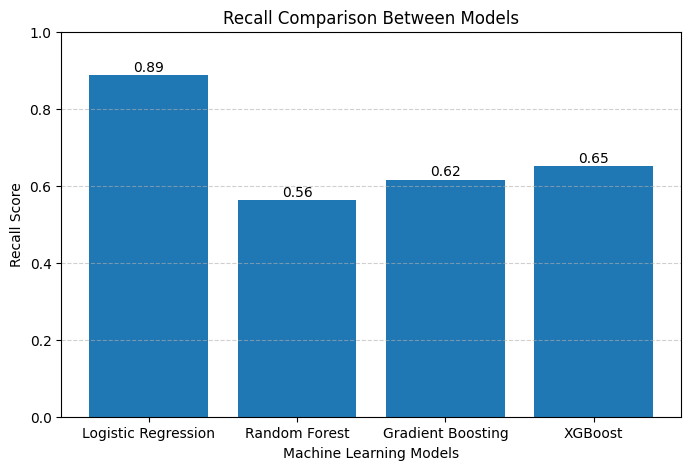

In [47]:
plt.figure(figsize=(8,5))
plt.bar(recall_df["Model"], recall_df["Recall"])
plt.ylim(0, 1)
plt.title("Recall Comparison Between Models")
plt.ylabel("Recall Score")
plt.xlabel("Machine Learning Models")
plt.grid(axis="y", linestyle="--", alpha=0.6)

for index, value in enumerate(recall_df["Recall"]):
    plt.text(index, value + 0.01, f"{value:.2f}", ha="center")

plt.show()

##  Model Comparison: Logistic Regression vs. XGBoost

To determine the most suitable model for customer churn prediction, a detailed comparison was conducted between **Logistic Regression** and **XGBoost**, focusing on performance metrics that are critical for business decision-making.

---

###  Performance Metrics Comparison

| Metric | Logistic Regression | XGBoost |
|------|---------------------|---------|
| Accuracy | 0.65 | **0.78** |
| Precision (Churn = 1) | 0.43 | **0.58** |
| Recall (Churn = 1) | **0.89** | 0.65 |
| F1-score (Churn = 1) | 0.58 | **0.61** |

---

###  Model Behavior Analysis

#### Logistic Regression
- Achieved the **highest recall**, successfully identifying the majority of churned customers.
- However, it suffered from **low precision**, leading to a high number of false positives.
- This behavior may result in unnecessary retention actions being applied to non-churn customers.

**Best suited for:**
- Scenarios where missing a churned customer is more costly than contacting additional customers.

---

#### XGBoost
- Demonstrated a **balanced performance** across all evaluation metrics.
- Maintained a strong recall while significantly improving precision and overall accuracy.
- Reduced false positive predictions compared to Logistic Regression.

**Best suited for:**
- Real-world deployment where both churn detection and operational cost control are important.

---

###  Final Model Selection

Although Logistic Regression achieved superior recall, **XGBoost was selected as the final model** due to its ability to balance recall, precision, and accuracy. This makes XGBoost more reliable and practical for production environments.

---

###  Conclusion
- **Logistic Regression** excels in maximizing churn detection.
- **XGBoost** offers a more stable and deployment-ready solution with improved overall performance.

The final decision was driven by business requirements and real-world applicability rather than a single evaluation metric.


<div style="text-align: center;">
  <h1><b>🏁 Full Machine Learning Project on telco_churn Datasets Completed Successfully</b></h1>
</div>